In [1]:
# KNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Read in the data
raw_data = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
# raw_data.info()
# remove repeated data
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [4]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(raw_data.iloc[:, :-1], raw_data.iloc[:, -1], test_size=0.2, random_state=42)

Text(0, 0.5, 'Error Rate')

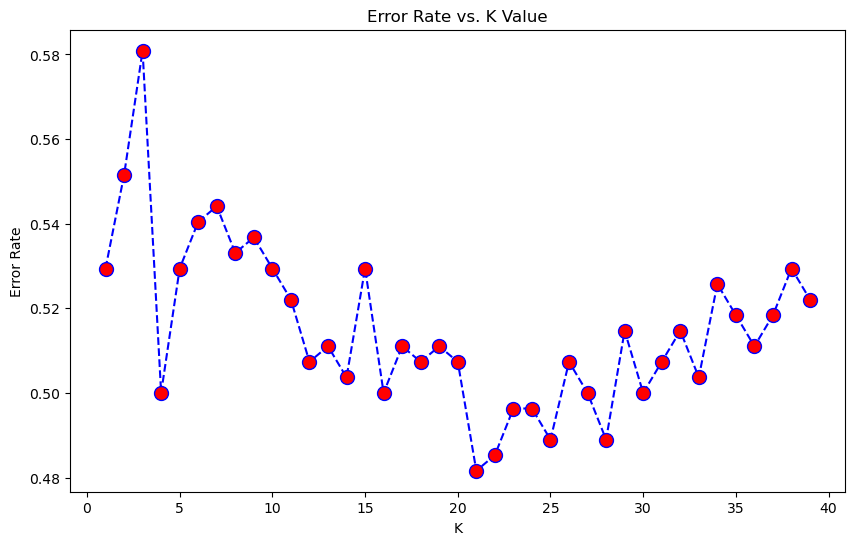

In [6]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rate = []
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
         linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
# read the data
raw_data = pd.read_csv('winequality-red.csv', sep=';')

In [9]:
# remove outliers
for col in raw_data.columns:
	if col != 'quality':
		iqr = raw_data[col].quantile(0.75) - raw_data[col].quantile(0.25)
		upper_bound = raw_data[col].quantile(0.75) + 2.5 * iqr
		lower_bound = raw_data[col].quantile(0.25) - 2.5 * iqr
		raw_data = raw_data[(raw_data[col] < upper_bound) & (raw_data[col] > lower_bound)]

# save the cleaned data
raw_data.to_csv('cleaned_data.csv', index=False)

In [10]:
# raw_data.info()
# remove repeated data
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1182 non-null   float64
 1   volatile acidity      1182 non-null   float64
 2   citric acid           1182 non-null   float64
 3   residual sugar        1182 non-null   float64
 4   chlorides             1182 non-null   float64
 5   free sulfur dioxide   1182 non-null   float64
 6   total sulfur dioxide  1182 non-null   float64
 7   density               1182 non-null   float64
 8   pH                    1182 non-null   float64
 9   sulphates             1182 non-null   float64
 10  alcohol               1182 non-null   float64
 11  quality               1182 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.0 KB


In [11]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,8.268613,0.525816,0.260398,2.255118,0.078864,15.692893,45.126481,0.996585,3.318037,0.638528,10.437437,5.636210
std,1.674834,0.176989,0.189768,0.545431,0.015813,9.689748,30.292622,0.001773,0.146733,0.126400,1.064568,0.801972
min,4.700000,0.120000,0.000000,0.900000,0.038000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,8.000000,22.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.245000,2.200000,0.078000,14.000000,37.000000,0.996600,3.320000,0.610000,10.200000,6.000000
75%,9.200000,0.640000,0.410000,2.500000,0.088000,21.000000,60.000000,0.997690,3.410000,0.710000,11.100000,6.000000
max,14.300000,1.240000,0.760000,4.300000,0.136000,53.000000,152.000000,1.002100,3.850000,1.130000,14.000000,8.000000


In [12]:
# Standardization
scaler = StandardScaler()
raw_data.iloc[:, :-1] = scaler.fit_transform(raw_data.iloc[:, :-1])

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_data.iloc[:, :-1], raw_data.iloc[:, -1], test_size=0.3, random_state=42)

In [14]:
# # gird search on K and distance function
# from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 50))
# weight_options = ['uniform', 'distance']
# distance_metric = ['euclidean', 'manhattan', 'minkowski', 'cosine']
# param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=distance_metric)
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
# grid.fit(X_train, y_train)
#
# # print the best parameters
# print(grid.best_params_)
# print(grid.best_score_)

Maximum test score: 0.6197183098591549 at K = 17


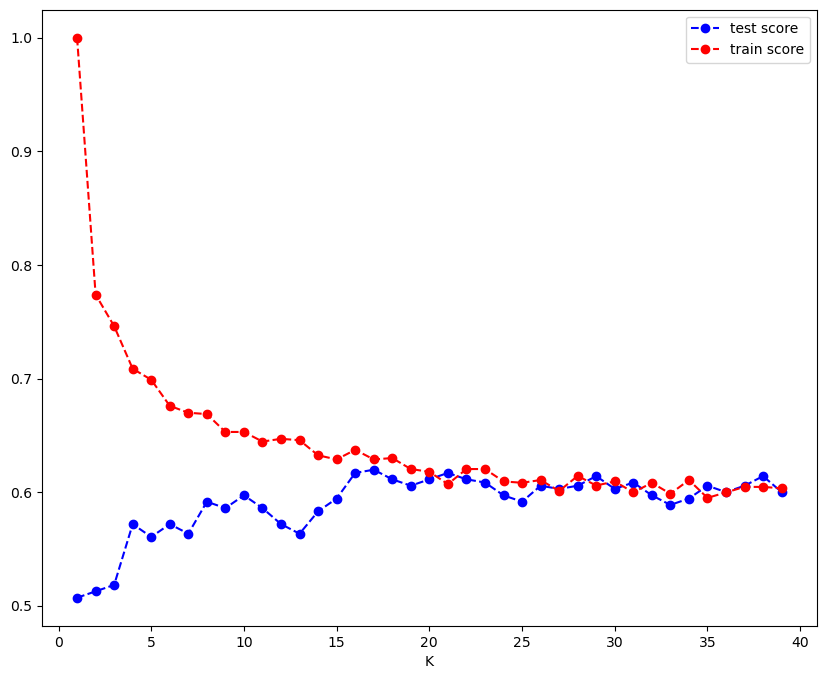

In [15]:
train_score = []
test_score = []
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	test_score.append(knn.score(X_test, y_test))
	train_score.append(knn.score(X_train, y_train))


plt.figure(figsize =(10, 8))

plt.plot(range(1, 40), test_score, color ='blue', linestyle ='dashed', marker ='o')


plt.plot(range(1, 40), train_score, color ='red', linestyle ='dashed', marker ='o')

plt.xlabel('K')
plt.legend(['test score', 'train score'], loc ='upper right')

print("Maximum test score:",max(test_score),"at K =",test_score.index(max(test_score))+1)


In [16]:
# k = 17
classifier = KNeighborsClassifier(n_neighbors = 17)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [17]:
#Predicting the ouput from input data (x_train) and (y_train)
y_pred1 = classifier.predict(X_train)
y_pred2 = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, mean_squared_error

print("train score",accuracy_score(y_train, y_pred1))
print("test score",accuracy_score(y_test, y_pred2))
print("MSE",mean_squared_error(y_test, y_pred2))

y_test = np.array(y_test)

train score 0.6287787182587666
test score 0.6197183098591549
MSE 0.49859154929577465


Shap of y_pred:  (355,)


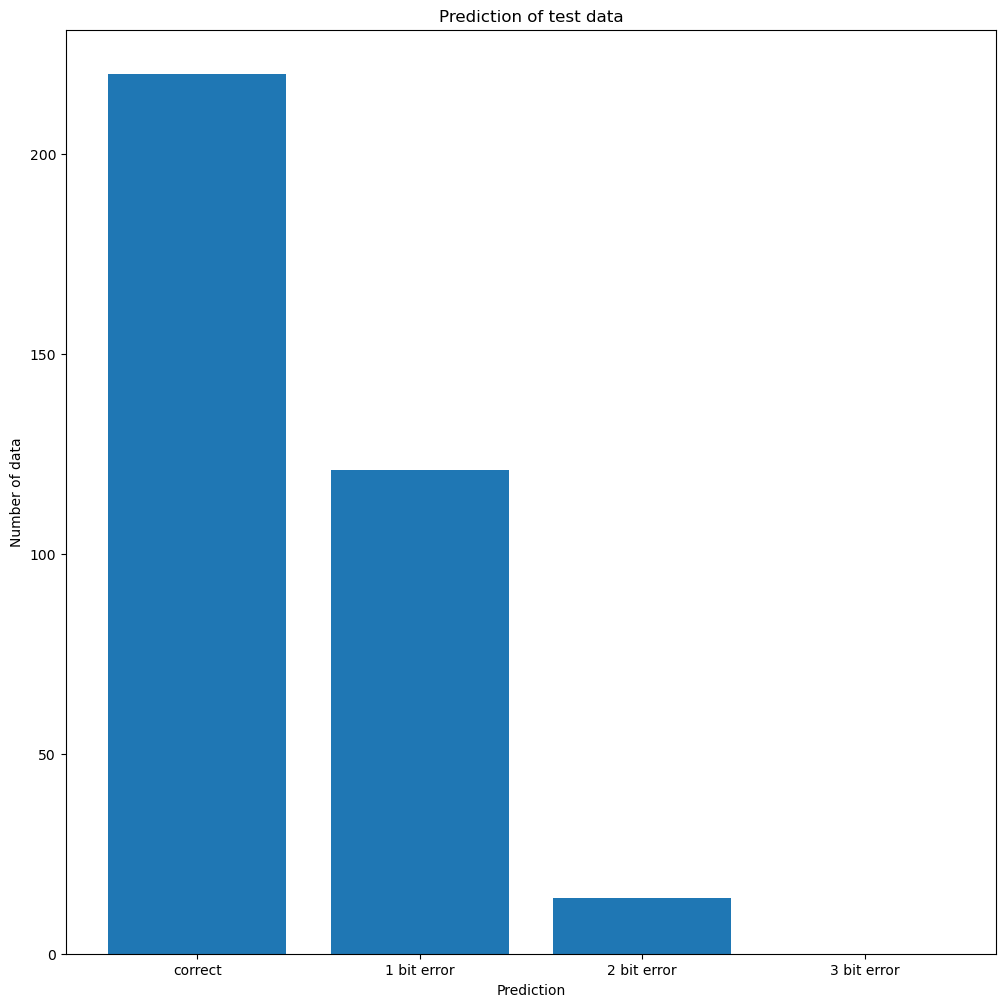

In [19]:
# visualization
correct = 0
one_bit_error = 0
two_bit_error = 0
threemore_bit_error = 0
print('Shap of y_pred: ', y_test.shape)
for i in range(len(y_pred2)):
	if y_pred2[i] == y_test[i]:
		correct += 1
	elif abs(y_pred2[i] - y_test[i]) == 1:
		one_bit_error += 1
	elif abs(y_pred2[i] - y_test[i]) == 2:
		two_bit_error += 1
	else:
		threemore_bit_error += 1
plt.figure(figsize=(12, 12))
plt.bar(['correct', '1 bit error', '2 bit error', '3 bit error'], [correct, one_bit_error, two_bit_error, threemore_bit_error])
plt.title('Prediction of test data')
plt.xlabel('Prediction')
plt.ylabel('Number of data')
plt.show()